## NAME: KUNAL ANAND   ROLL NO:18CSU110 

## DATASET OVERVIEW

### DATASET NAME: ONLINE SHOPPER'S INTENTION
This data consists of various Information related to customer's behavior while they are visiting or buying different things from online shopping websites. 




## Attribute Information:

The dataset consists of 14 numerical and 4 categorical attributes.

* 'Revenue'(CATEGORICAL) attribute can be used as the class label which tells that customer Buys or not Buys any product.
* "Administrative"(website home|starting page), "Administrative Duration", "Informational"(Website page which gives latest news & info regarding the company) , "Informational Duration", "Product Related" and         "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and  total time spent in each of these page categories.
  ""The values of these features are derived from the URL information of the pages visited by the user and updated         in real time when a user takes an action, e.g. moving from one page to another.""

* The "Bounce Rate", "Exit Rate" & "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
  *The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that    page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
  *The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page,the            percentage that were the last in the session. 
  *The value of "Page Value" feature represents the average value for a web page that a user visited before completing    e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
  ""For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before     and after this date unless it is close to another special day, and its maximum value of 1 on February 8."" 

* "operating system" feature having 4 different OS.
* "Region" feature having values from 1-9,customers belonging to 9 different regions.
* "Browswer" feature showing 4 different browser's used(for Ex. Firefox,Chrome,internet explorer & opera)
* "Traffic Type" feature having values from 1-20.
* "visitor type"(CATEGORICAL) as returning(old) or new visitor.
* "Weekend"(CATEGORICAL) Boolean value indicating whether the date of the visit is weekend or not.
* "Month"(CATEGORICAL) represents month of the year.


In [ ]:
## TABLE OF CONTENTS
1. Data Visualization
2. Data Preprocessing
3. K Means Clustering on 2 Variables
4. K Means Clustering on all 14 Columns
   *Performance Measures: Elbow Method,Silhoutte Score
5. Hierarichal Clustering an all 14 Columns

## DATA VISUALIZATION

## Get The Data


### Import Libraries:
** Import the libraries you usually use for data analysis.**


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\KUNAL\Documents\Unsupervised_learning\Clustering_Project1\online_shoppers_intention.csv')
dataset



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
# checking the head of the data
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# calculating Five-Point summary of the data
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Uni-Variate Analysis of the Data

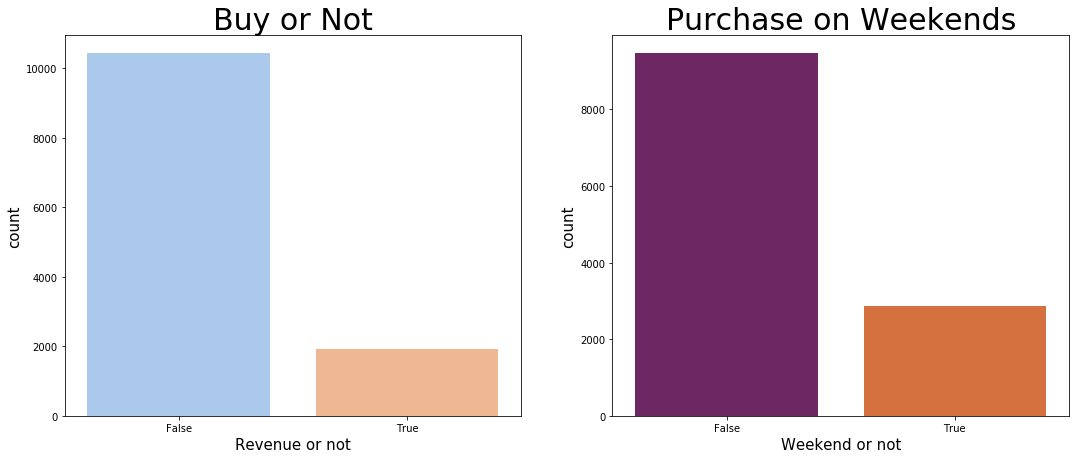

In [5]:

# checking the Distribution of customers on Revenue(Buy or Not Buy)
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend( Customers buy on weekend or not)
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [4]:
dataset.corr()['Revenue'].sort_values()

ExitRates                 -0.206886
BounceRates               -0.150621
SpecialDay                -0.082305
OperatingSystems          -0.014668
Region                    -0.011595
TrafficType               -0.005113
Browser                    0.023984
Weekend                    0.029295
Informational_Duration     0.070250
Administrative_Duration    0.093395
Informational              0.095085
Administrative             0.138631
ProductRelated_Duration    0.152130
ProductRelated             0.158280
PageValues                 0.492569
Revenue                    1.000000
Name: Revenue, dtype: float64

In [7]:
dataset['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
dataset['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

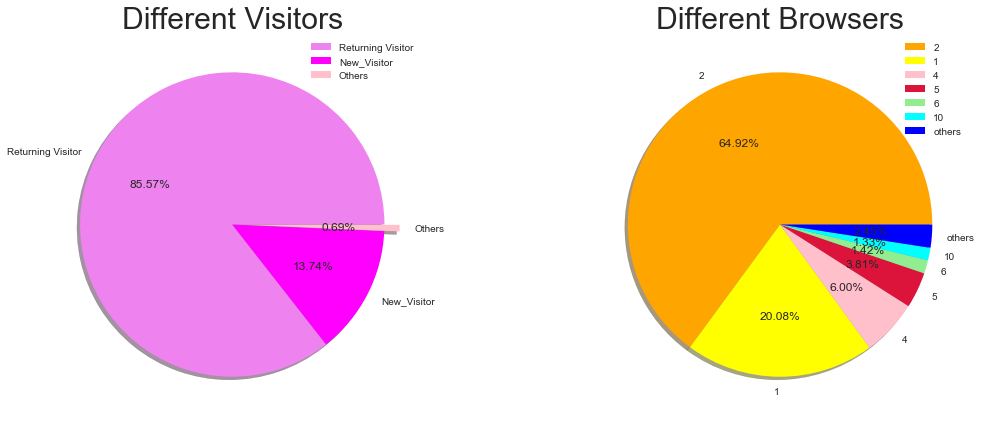

In [33]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [10]:
# checking the no. of OSes each user is having

dataset['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [11]:
#checking the months with most no.of customers visiting the online shopping sites

dataset['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

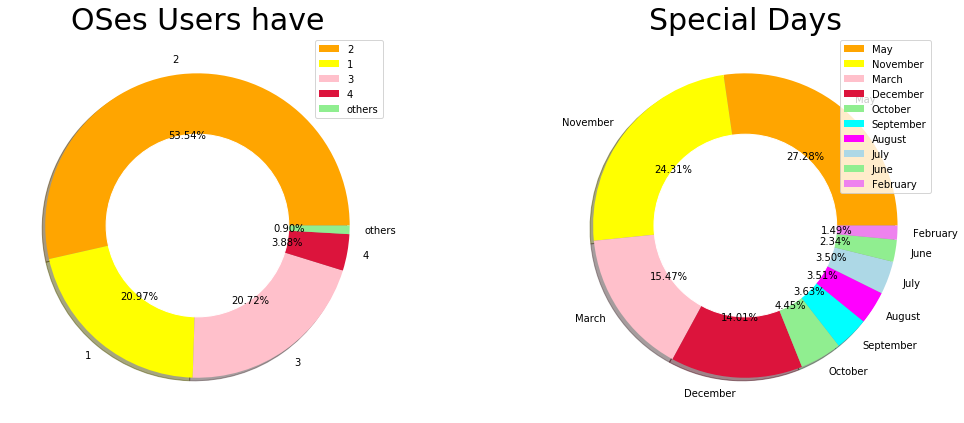

In [12]:
#creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

### Bi-Variate Analysis of the Data

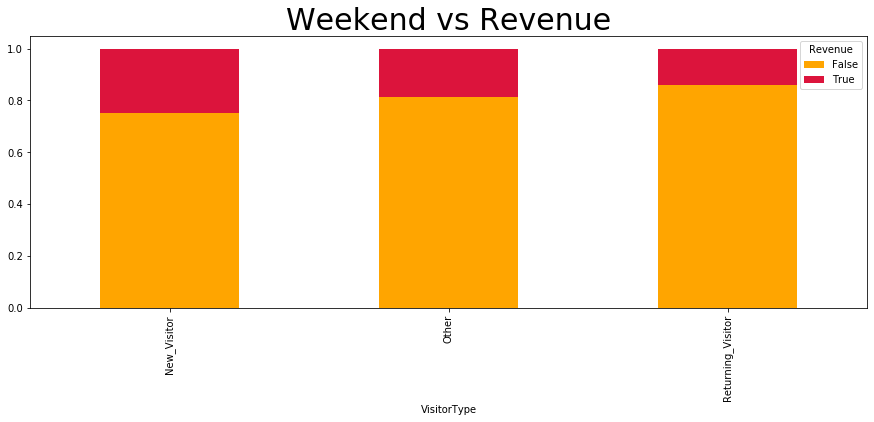

In [13]:
# VisitorType vs Revenue

df = pd.crosstab(dataset['VisitorType'], dataset['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()



Text(0.5, 1.0, 'VisitorType vs Revenue')

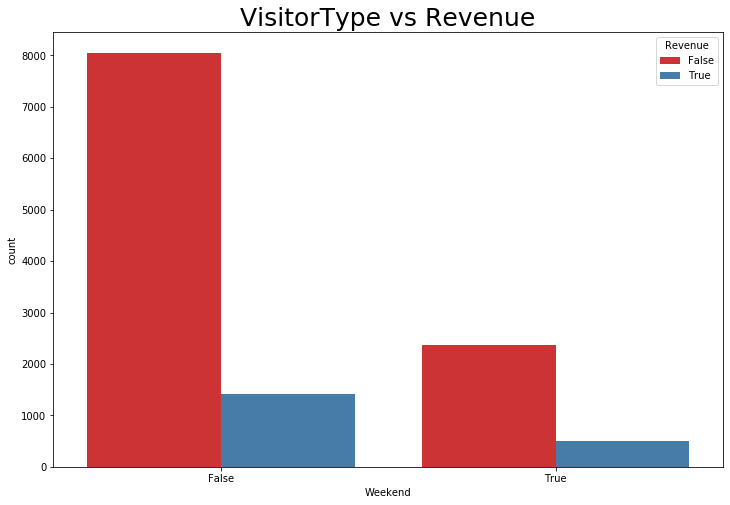

In [14]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Weekend", data=dataset,hue='Revenue',palette='Set1',ax=ax)
plt.title('VisitorType vs Revenue', fontsize = 25)


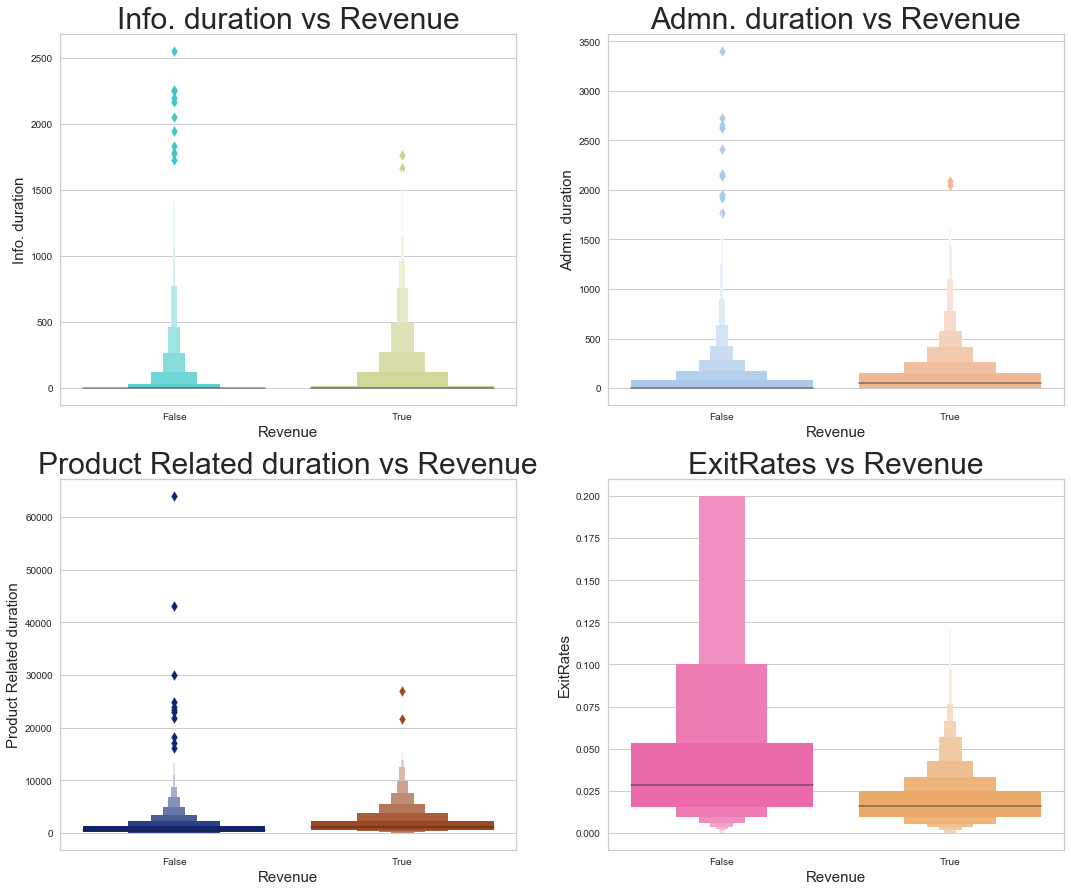

In [35]:
# product related duration vs revenue
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)# divide 4 plots into 2 rows & 2 columns and 1 for in 1st row and 1st column
sns.boxenplot(dataset['Revenue'], dataset['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Info. duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(dataset['Revenue'], dataset['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Admn. duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(dataset['Revenue'], dataset['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Product Related duration', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(dataset['Revenue'], dataset['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)





plt.show()

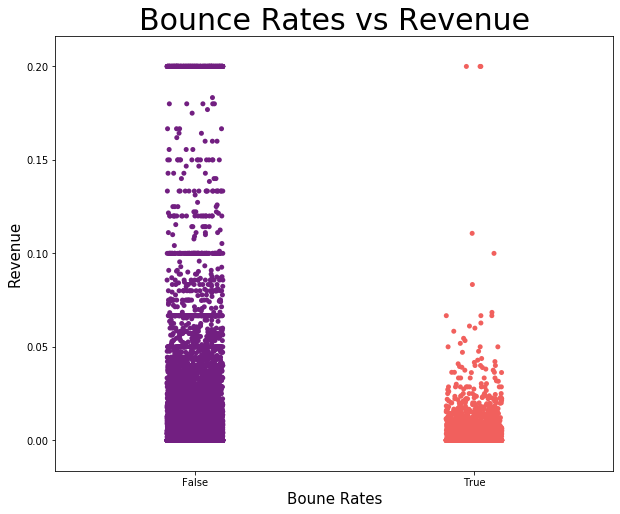

In [16]:
# bounce rates vs revenue
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(dataset['Revenue'], dataset['BounceRates'], palette = 'magma',ax=ax)
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

### Multi-Variate Analysis

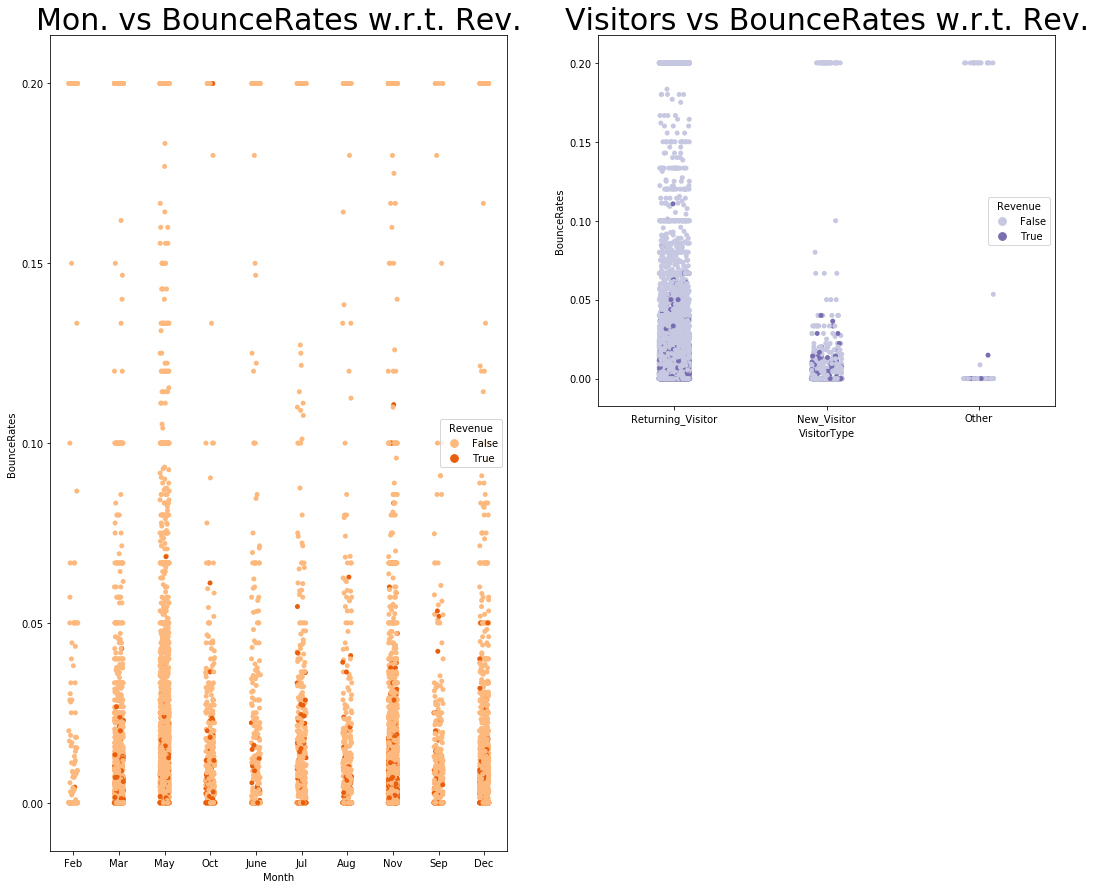

In [17]:
# month vs bouncerates wrt revenue

plt.subplot(1, 2, 1)
sns.stripplot(x = dataset['Month'], y = dataset['BounceRates'], hue = dataset['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.stripplot(x = dataset['VisitorType'], y = dataset['BounceRates'], hue = dataset['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

## DATA PREPROCESSING

In [3]:
# checking the percentage of missing data contains in all the columns
missing_percentage = dataset.isnull().sum()/100
print(missing_percentage)

Administrative             0.14
Administrative_Duration    0.14
Informational              0.14
Informational_Duration     0.14
ProductRelated             0.14
ProductRelated_Duration    0.14
BounceRates                0.14
ExitRates                  0.14
PageValues                 0.00
SpecialDay                 0.00
Month                      0.00
OperatingSystems           0.00
Browser                    0.00
Region                     0.00
TrafficType                0.00
VisitorType                0.00
Weekend                    0.00
Revenue                    0.00
dtype: float64


In [4]:
# Inputing Missing Values with 0

dataset.fillna(0, inplace = True)

# checking the no. of null values in data after imputing the missing values
dataset.isnull().sum().sum()

0

#### Dropping 4 Categorical columns: Month,VisitorType,Weekend & Revenue

In [5]:
dataset.drop('Month',axis=1,inplace =True)

In [6]:
dataset.drop('VisitorType',axis=1,inplace =True)

In [7]:
dataset.drop('Weekend',axis=1,inplace =True)

In [8]:
X = dataset.iloc[:,:-1]

In [9]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [10]:
# Using Standard scaler to scale are values btw 0 & 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

# K MEANS CLUSTERING

For this project we will attempt to use KMeans Clustering to cluster Customers into 3 groups:Un Interested,Interested and Most Interested Customers
* Un - interested Customers:Customers who spend least time on Online Shopping Website's & do not buys anything
* Interested Customer:Customers who spend minimum time on Online Shopping Website's & do buys some Products
* Most Interested Customers:Customers who spend maximum time on Online Shopping Website's & buys many Products
    
First we will apply K means Clustering by taking 2 columns at a time

At the end we will take all 14 numerical columns and apply k Means clustering on it.

## Applying K means Clustering on 2 Columns

## Trying to learn the user characteristics of in terms of time spent on the Website

### 1. Administrative Duration vs Bounce Rate

In [14]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = dataset.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape

(12330, 2)

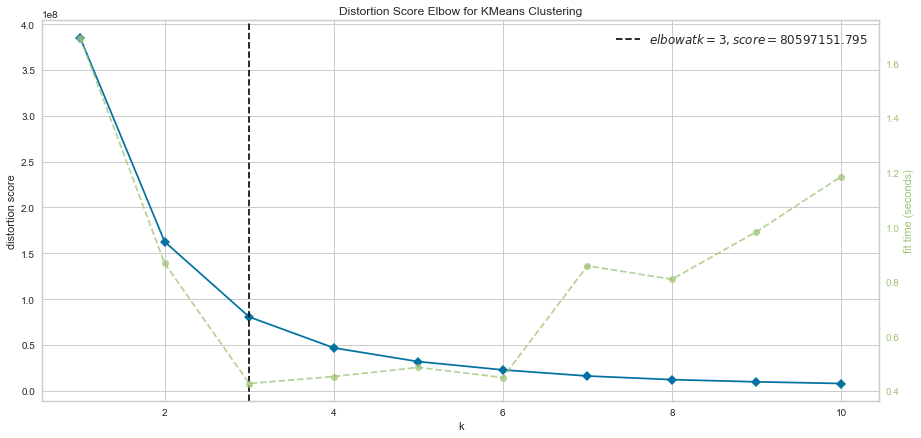

AxesSubplot(0.125,0.125;0.775x0.755)


In [15]:
# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

km=KMeans()
visualizer=KElbowVisualizer(km,k=(1,11))
visualizer.fit(x)
print(visualizer.show())

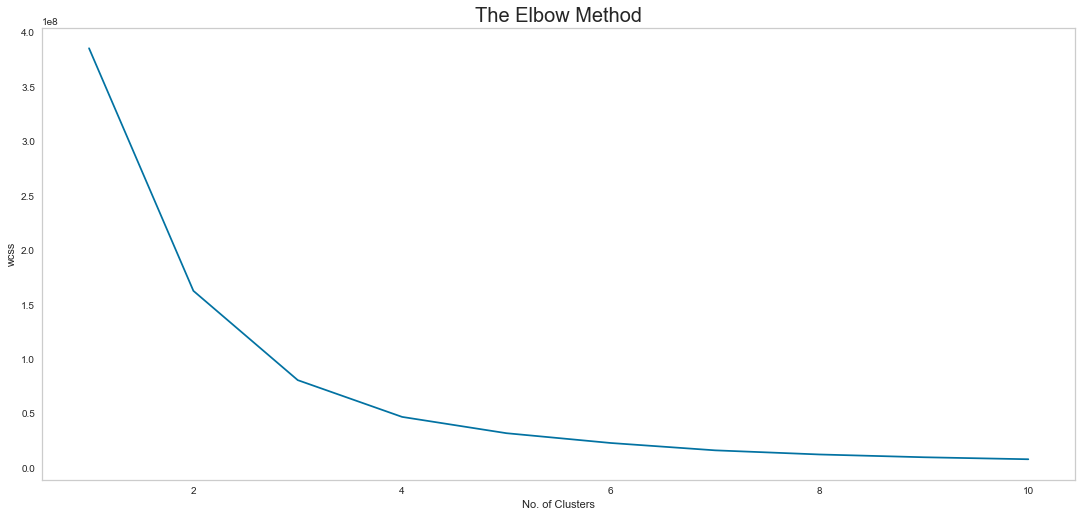

In [16]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = dataset.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape

# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

#Inertia(intra-distance from the centroid):sum of squared distance btw members of cluster & its centroid
#n_cluster:no. of clusters,random_state:so take same random values and the prediction remain same,
#max_iter:Maximum number of iterations of the k-means algorithm for a single run.
#init:selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
# Visualizing the elbow method    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for
Adminstrative Duration and Revenue is Three. 

In [17]:
# Fitting  & predicting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

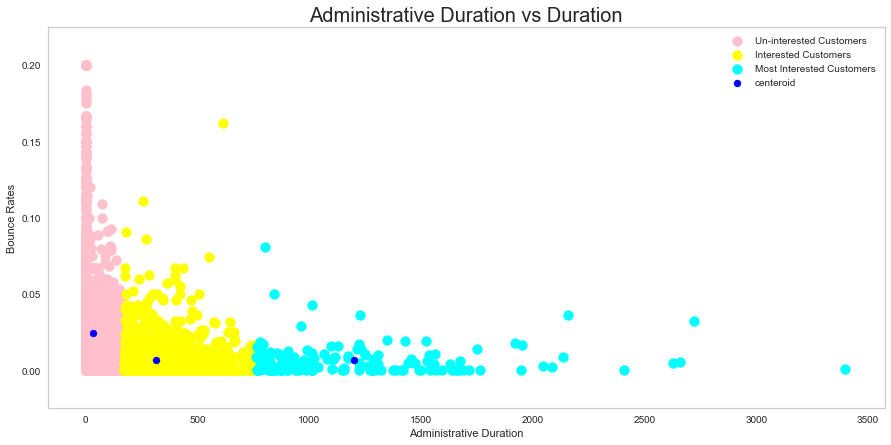

In [18]:
# Visualising the clusters (only for 2D clustering)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Interested Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.

There are Three Groups, The Pink Group(Un-interested) is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a website 
Yellow Group(Interested)is a group of customers who stay for medium adminstrative duration and have minimum chance for Navigating away from a website 
Blue Group(Most-Interested)is a group of customers who stay for Highest adminstrative duration and have lowest chance for Navigating away from a website 

In [31]:
print(km.labels_[:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [23]:
# Adding the y_means predicted cluster labels to the original dataset so as to compair the predicted cluster's with diffferent Features
datacopy=dataset.copy()
datacopy['Cluster_labels']=y_means
datacopy.tail(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,labels
12230,6.0,580.333333,0.0,0.00,43.0,1326.107143,0.018367,0.018160,0.000000,0.0,1,1,3,2,True,1
12231,1.0,14.000000,0.0,0.00,11.0,239.583333,0.000000,0.016667,0.000000,0.0,2,2,6,1,False,0
12232,0.0,0.000000,0.0,0.00,18.0,413.666667,0.000000,0.047222,0.000000,0.0,2,2,6,1,False,0
12233,13.0,399.750000,3.0,47.75,61.0,1458.993056,0.001786,0.016552,17.497219,0.0,1,1,1,2,False,1
12234,0.0,0.000000,0.0,0.00,36.0,872.833333,0.000000,0.007059,81.027296,0.0,2,4,1,8,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.000000,0.0,0.00,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,False,0
12326,0.0,0.000000,0.0,0.00,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,False,0
12327,0.0,0.000000,0.0,0.00,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,False,0
12328,4.0,75.000000,0.0,0.00,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,0


### 2.)informational duration vs Bounce Rates

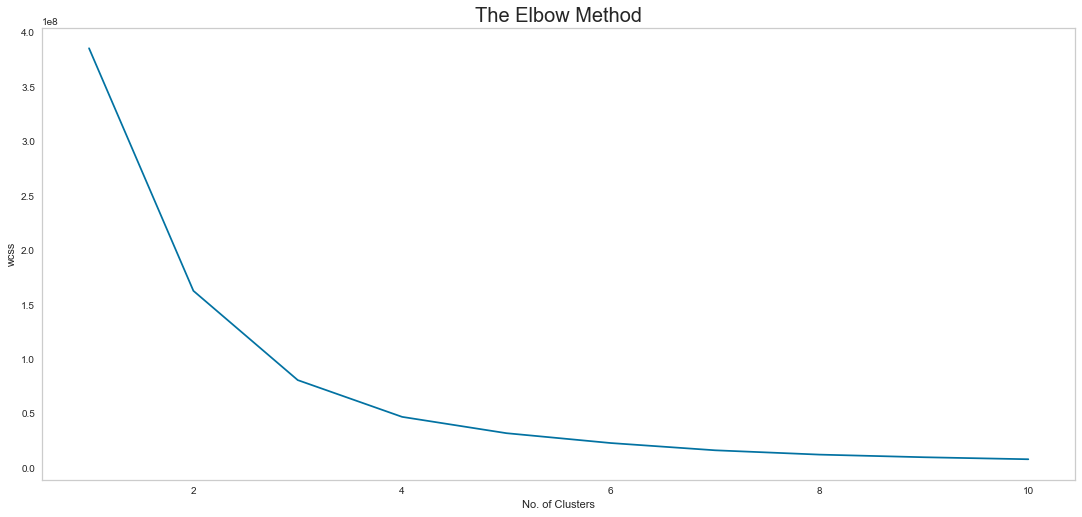

In [22]:
# informational duration vs Bounce Rates
x = dataset.iloc[:, [1, 7]].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42,
              )
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
# Fitting  & predicting K-Means to the dataset with k=2 clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)



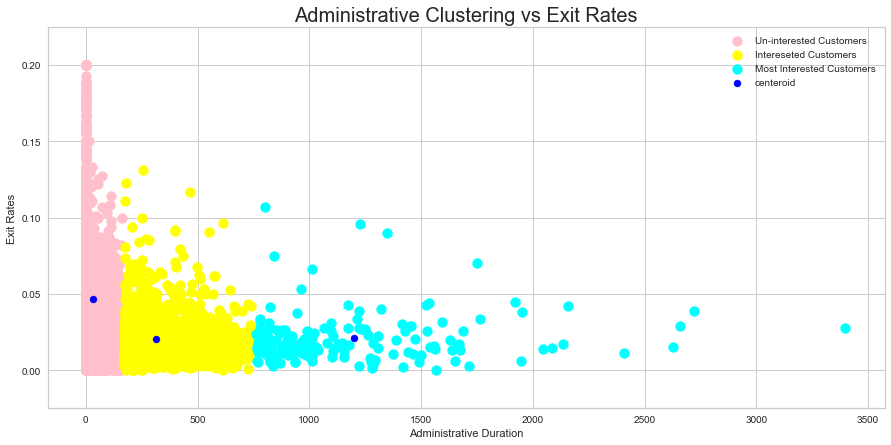

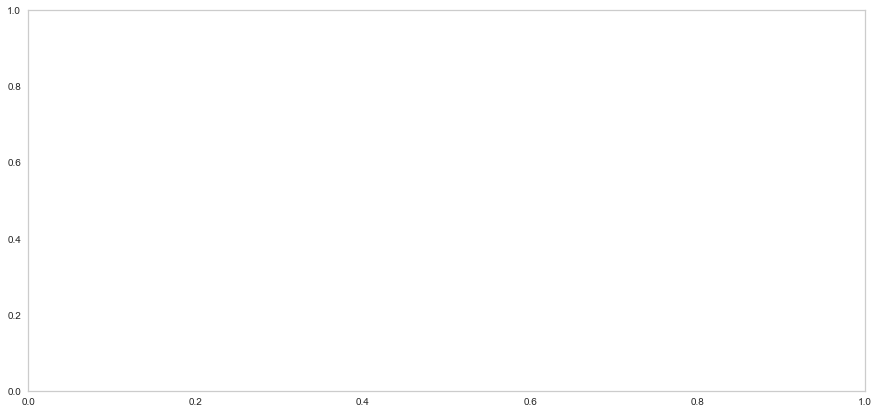

In [28]:
# Visualising the clusters (only for 2D clustering)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Intereseted Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.grid(plt.show())

## Where from the Users of the Website come?

C:\Users\KUNAL\AnacondaN\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


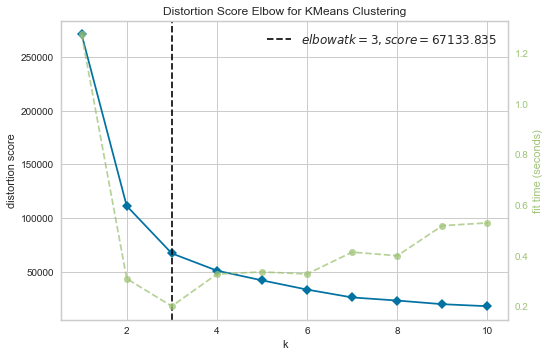

AxesSubplot(0.125,0.125;0.775x0.755)


In [11]:
# Region vs Traffic
x1 = dataset.iloc[:, [12, 13]].values
# Using the elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

KM=KMeans()
visualizer=KElbowVisualizer(KM,k=(1,11))
visualizer.fit(x1)
print(visualizer.show())

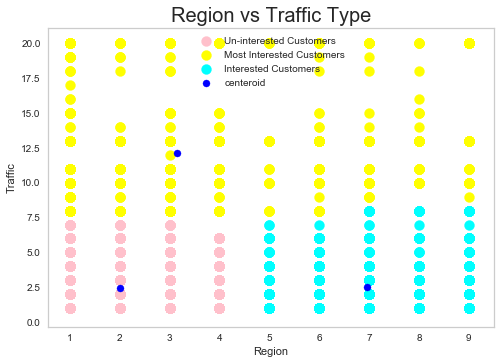

In [12]:
KM = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = KM.fit_predict(x1)

plt.scatter(x1[y_means == 0, 0], x1[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x1[y_means == 1, 0], x1[y_means == 1, 1], s = 100, c = 'yellow', label = 'Most Interested Customers')
plt.scatter(x1[y_means == 2, 0], x1[y_means == 2, 1], s = 100, c = 'cyan', label = 'Interested Customers')
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

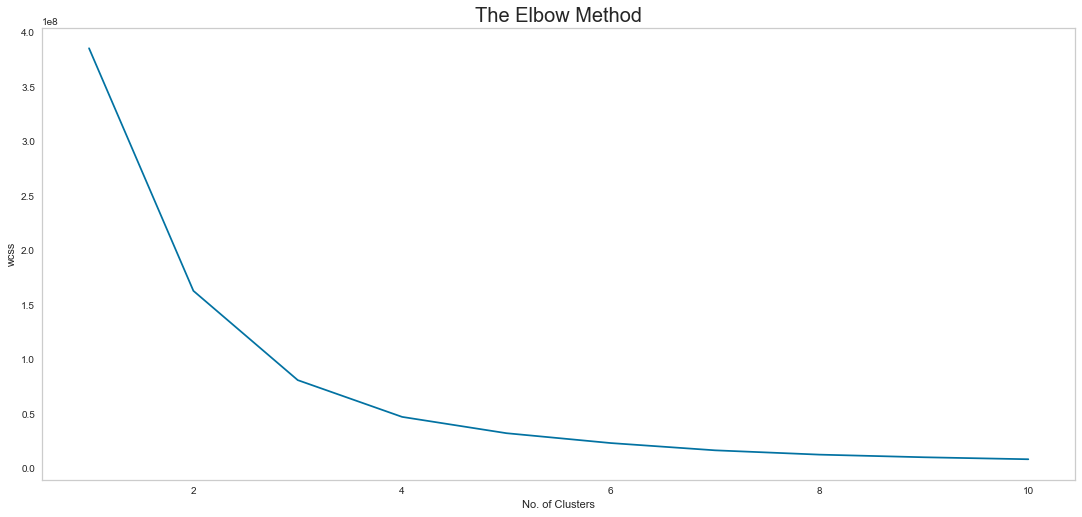

In [13]:
# informational duration vs Bounce Rates
x2 = dataset.iloc[:, [1, 12]].values

wcss = []
for i in range(1, 11):
    KM = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              )
    KM.fit(x2)
    labels = KM.labels_
    wcss.append(KM.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

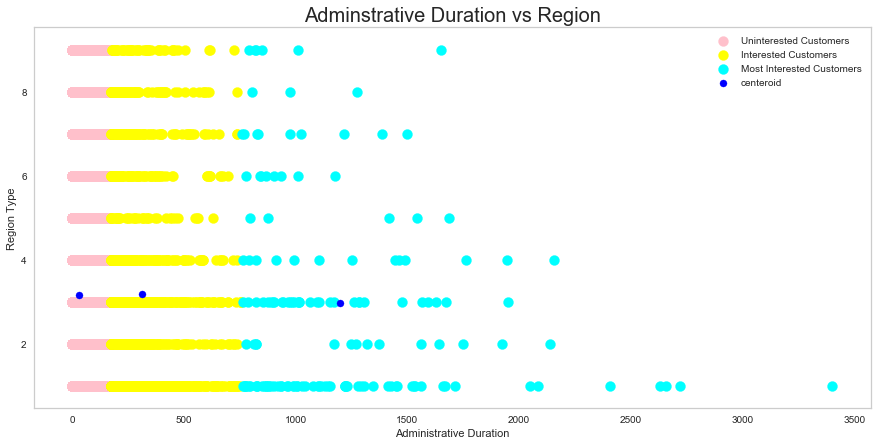

In [30]:
KM = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = KM.fit_predict(x2)

plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 100, c = 'pink', label = 'Uninterested Customers')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 100, c = 'yellow', label = 'Interested Customers')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = 'cyan', label = 'Most Interested Customers')
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()


## Applying K means Clustering on all 14 numerical columns

In [14]:
# Importing the Kmeans Class
from sklearn.cluster import KMeans


### 1.)Performance Measure-Elbow Method

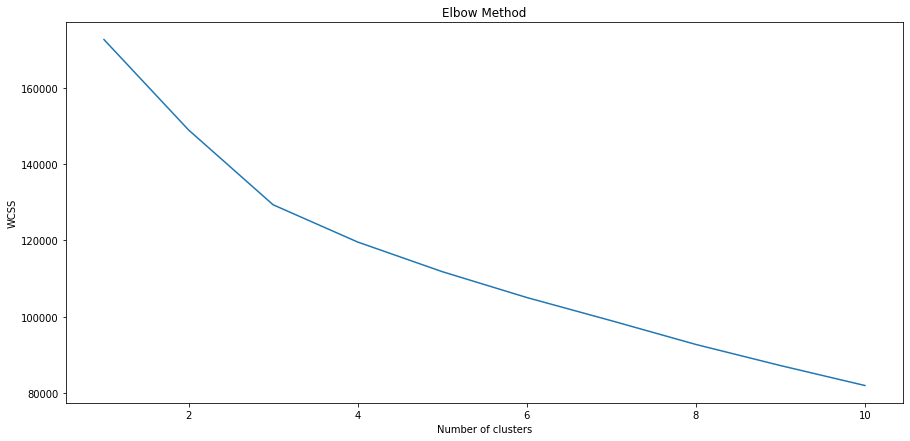

In [20]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters i.e K=3

In [21]:
# Fitting  & predicting K-Means to the dataset for K=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10,random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [22]:
kmeans.inertia_

129337.42629466216

In [23]:
# Fitting  & predicting K-Means to the dataset for K=2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10,random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [24]:
kmeans.inertia_

148947.25611313758

### Inertia(intra- Cluster distance of points from the centroid):sum of squared distance btw members of cluster & its centroid
So,Therefore we must have less Inertia and wcss Value to Obtain optimal Cluster's and since k=3 has a less inertia value than k=2 so we take K=3 as an optimal cluster value

## 2.)Performance Measure-Silhoutte Coefficient
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

Silhoutte Formula:b(mean nearest cluster distance)-a(mean intra cluster distance)/max(a(i),b(i))

How close the data point is to other points in the cluster How far away the data point is from points in other clusters Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


In [31]:
X1 = dataset.iloc[:, [1, 6]].values

In [32]:
X1.shape

(12330, 2)

In [17]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter=100, n_init=10)
    kmeans.fit(X1)
    score = silhouette_score(X1, kmeans.labels_)
    silhouette_coefficients.append(score)
    
  

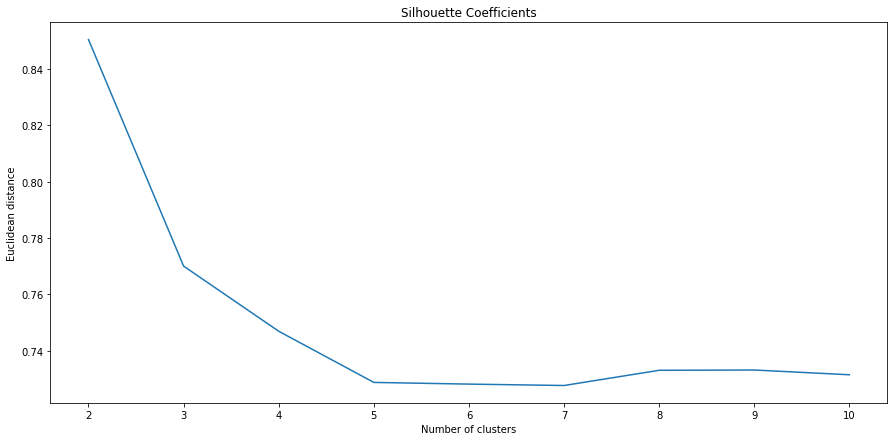

In [18]:

plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [17]:
# Fitting  & predicting K-Means to the dataset for K=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [18]:
kmeans.inertia_

129337.40726488162

In [20]:
score

0.7316112048311476

In [23]:
# Fitting  & predicting K-Means to the dataset for K=2
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [24]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [25]:
kmeans.inertia_

112095.36934497298

In [26]:
kmeans_silhouette

0.18935637822401877

As observed with k=5 the silhouette score reduces hence we can claim that k=5 gives optimal clusters.

# HIERARICHAL CLUSTERING

In [19]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = dataset.iloc[:, [1, 6]]

# checking the shape of the dataset
x

,Administrative_Duration,BounceRates
0,0.0,0.200000
1,0.0,0.000000
2,-1.0,0.200000
3,0.0,0.050000
4,0.0,0.020000
...,...,...
12325,145.0,0.007143
12326,0.0,0.000000
12327,0.0,0.083333
12328,75.0,0.000000


### Dendogram is not a useful Performance Measure to identify optimal clusters with large no. of data points & Features as there is lot of information lost as we move up in Agglomerative Method 

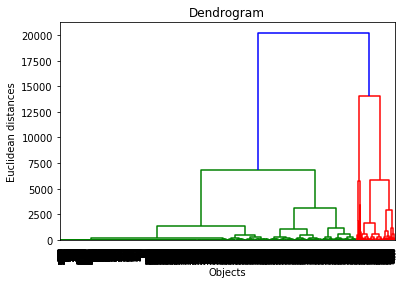

In [20]:
# Using the dendrogram to find the optimal number of clusters
#Ward linkage:combine 2 clusters on the agglomerative approach and calc total sum of squared deviations from mean of cluster
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Objects')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [24]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Visualising the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Un-interested customers')#0
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Interested Customers')#1
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Most Interested')#2
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative Duration vs Bounce Rates ')
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


In [39]:
# Normalised value of all 14 numerical columns and is converted into an array
X

array([[-0.69699296, -0.45716222, -0.39636998, ..., -0.79029289,
        -0.89417849, -0.76262903],
       [-0.69699296, -0.45716222, -0.39636998, ..., -0.20795193,
        -0.89417849, -0.51418219],
       [-0.69699296, -0.46281917, -0.39636998, ..., -0.79029289,
         2.43708134, -0.26573535],
       ...,
       [-0.69699296, -0.45716222, -0.39636998, ..., -0.20795193,
        -0.89417849,  2.21873304],
       [ 0.50722805, -0.03289125, -0.39636998, ..., -0.20795193,
        -0.06136354,  1.72183936],
       [-0.69699296, -0.45716222, -0.39636998, ..., -0.20795193,
        -0.89417849, -0.51418219]])

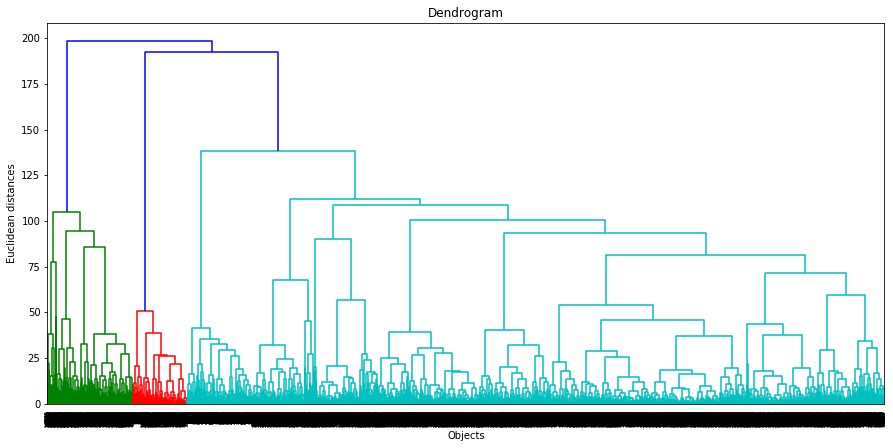

In [40]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Objects')
plt.ylabel('Euclidean distances')
plt.show()

### We have takem K=3 as the optimal cluster,Since the dataset contains 13000 points so it is difficult to obtain optimal k value

In [41]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [57]:
# Predicted Cluster Values
y_hc

array([2, 0, 2, ..., 0, 0, 0], dtype=int64)

In [53]:
#Reading the dataset again
data=pd.read_csv(r'C:\Users\KUNAL\Documents\Unsupervised_learning\Clustering_Project1\online_shoppers_intention.csv')


In [49]:
#Y representing Revenue Target column which represent that the customers buys or not buys Products 
Y=data.iloc[:,17].values

In [50]:
#LABEL ENCODING- Converting the independant variable into Binary form
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [51]:
#Making a dataframe & converting it to numpy array for compairing Y(REVENUE) value of buying & not buying with the predicted cluster values of being in cluster 1,2 or 3.
pd.DataFrame(data={'predict_Clusters':y_hc,'revenue':Y})


array([[2, 0],
       [0, 0],
       [2, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

### There could be no Visualization of Hierarichal because we are taking all 14 columns 

### Thanks !!